In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [6]:
df = pd.read_csv('TSLA.csv')

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,1.789333,1.800000,1.726667,1.774667,1.774667,19245000
1,2011-01-04,1.777333,1.796667,1.734667,1.778000,1.778000,17811000
2,2011-01-05,1.765333,1.793333,1.746000,1.788667,1.788667,21700500
3,2011-01-06,1.788667,1.866667,1.787333,1.858667,1.858667,30918000
4,2011-01-07,1.866667,1.905333,1.860000,1.882667,1.882667,33718500
...,...,...,...,...,...,...,...
3115,2023-05-19,177.169998,181.949997,176.309998,180.139999,180.139999,136024200
3116,2023-05-22,180.699997,189.320007,180.110001,188.869995,188.869995,132001400
3117,2023-05-23,186.199997,192.960007,185.259995,185.770004,185.770004,156952100
3118,2023-05-24,182.229996,184.220001,178.220001,182.899994,182.899994,137605100


In [9]:
type(df['Date'][0])

str

<AxesSubplot:xlabel='Date', ylabel='Open'>

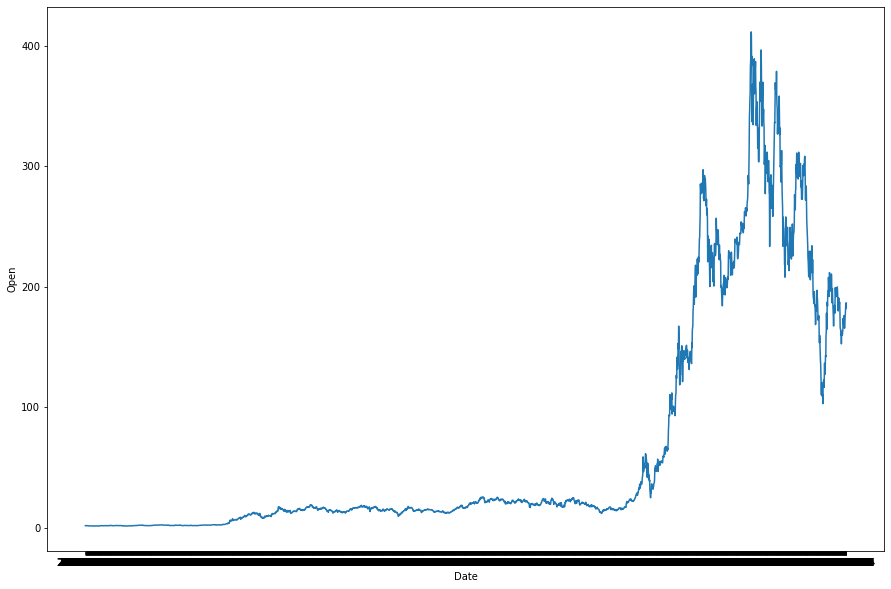

In [181]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df['Date'],y=df['Open'])

<AxesSubplot:xlabel='Date', ylabel='Close'>

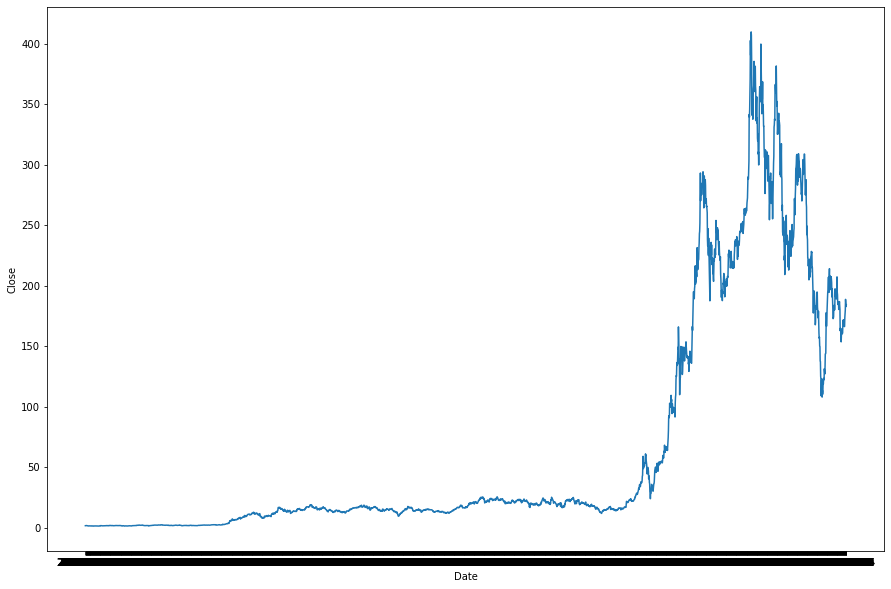

In [14]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df['Date'],y=df['Close'])

<AxesSubplot:xlabel='Date', ylabel='High'>

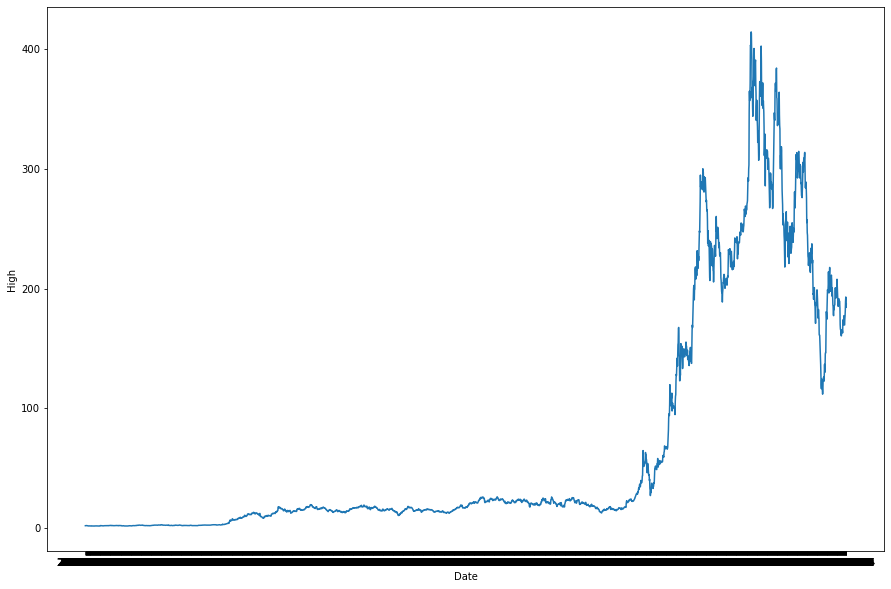

In [15]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df['Date'],y=df['High'])

<AxesSubplot:xlabel='Date'>

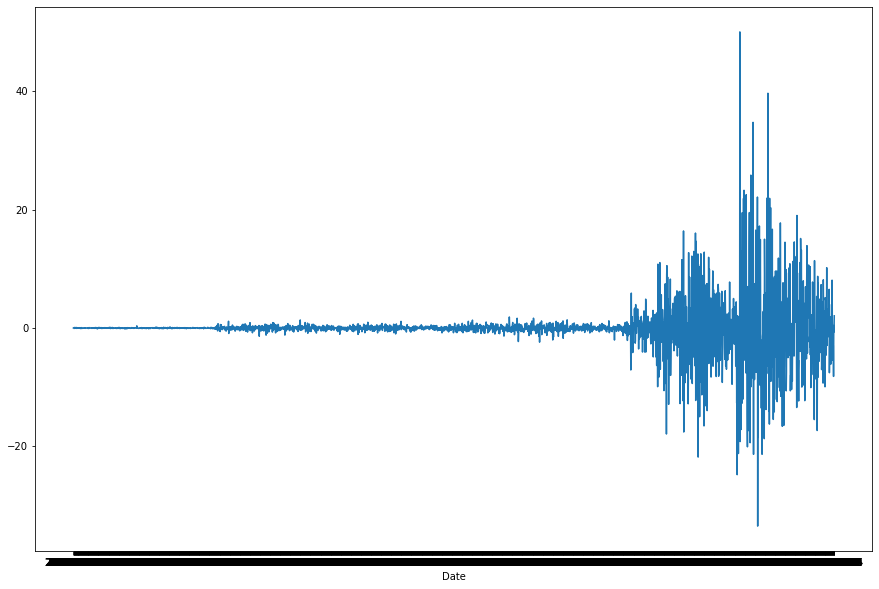

In [16]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df['Date'],y=df['Open']-df['Close'])

In [23]:
df.iloc[3101]

Date         2023-05-01
Open         163.169998
High         163.279999
Low          158.830002
Close        161.830002
Adj Close    161.830002
Volume        109015000
Name: 3101, dtype: object

In [27]:
df_train=df.iloc[0:3101]

In [28]:
df_test=df.iloc[3101:3120]

<AxesSubplot:xlabel='Date', ylabel='High'>

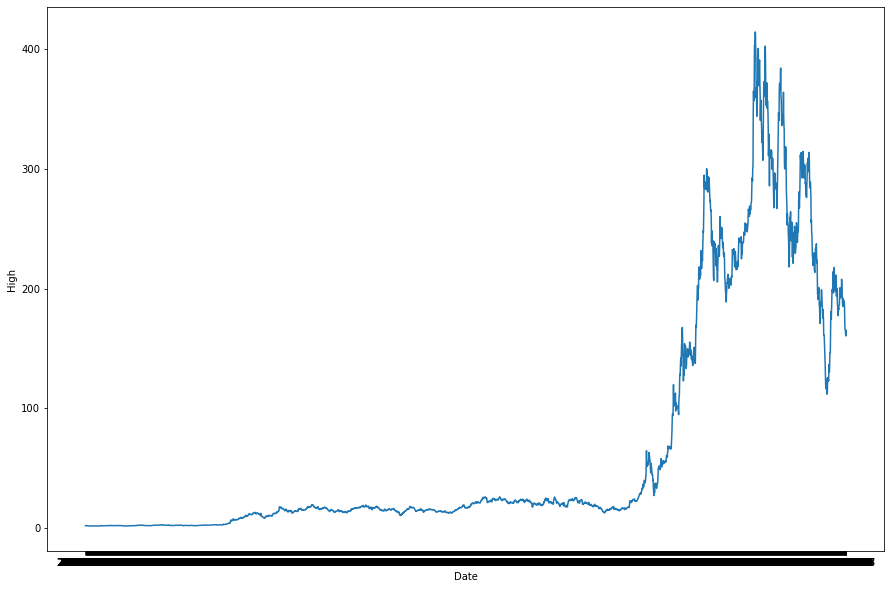

In [29]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df_train['Date'],y=df_train['High'])

In [32]:
training_set = df_train.iloc[:,1:2]
training_set

,Open
0,1.789333
1,1.777333
2,1.765333
3,1.788667
4,1.866667
...,...
3096,164.649994
3097,159.820007
3098,160.289993
3099,152.639999


In [33]:
training_set = training_set.values

In [34]:
training_set.shape

(3101, 1)

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [36]:
training_set_scaled

array([[0.00082273],
       [0.00079346],
       [0.00076419],
       ...,
       [0.38739273],
       [0.36873503],
       [0.38888047]])

In [37]:
X_train = []
y_train = []

In [38]:
for i in range(60,3101):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [39]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [40]:
X_train.shape

(3041, 60)

In [41]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [42]:
X_train.shape

(3041, 60, 1)

In [43]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout

In [44]:
regressor  = Sequential()

In [45]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape = (X_train.shape[1],1)))

In [46]:
regressor.add(Dropout(0.2))

In [47]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [48]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [49]:
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

In [50]:
regressor.add(Dense(units=1))

In [51]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [52]:
regressor.fit(x=X_train,y = y_train,epochs = 100, batch_size = 32)

Epoch 1/100
96/96 [==============================] - 27s 122ms/step - loss: 0.0062
Epoch 2/100
96/96 [==============================] - 12s 122ms/step - loss: 0.0026
Epoch 3/100
96/96 [==============================] - 12s 123ms/step - loss: 0.0023
Epoch 4/100
96/96 [==============================] - 12s 120ms/step - loss: 0.0019
Epoch 5/100
96/96 [==============================] - 12s 121ms/step - loss: 0.0016
Epoch 6/100
96/96 [==============================] - 12s 121ms/step - loss: 0.0016
Epoch 7/100
96/96 [==============================] - 12s 121ms/step - loss: 0.0017
Epoch 8/100
96/96 [==============================] - 12s 121ms/step - loss: 0.0015
Epoch 9/100
96/96 [==============================] - 12s 121ms/step - loss: 0.0015
Epoch 10/100
96/96 [==============================] - 12s 121ms/step - loss: 0.0013
Epoch 11/100
96/96 [==============================] - 12s 120ms/step - loss: 0.0012
Epoch 12/100
96/96 [==============================] - 12s 120ms/step - loss: 0.0013
E

In [53]:
real_stock_price = df_test.iloc[:,1:2].values

In [54]:
real_stock_price

array([[163.169998],
       [161.880005],
       [160.009995],
       [162.710007],
       [163.970001],
       [173.720001],
       [168.949997],
       [172.550003],
       [168.699997],
       [176.070007],
       [167.660004],
       [165.649994],
       [168.410004],
       [174.220001],
       [177.169998],
       [180.699997],
       [186.199997],
       [182.229996],
       [186.539993]])

In [55]:
dataset_total = pd.concat([df['Open'],df_test['Open']])
dataset_total = pd.DataFrame(dataset_total)

In [56]:
dataset_total

,Open
0,1.789333
1,1.777333
2,1.765333
3,1.788667
4,1.866667
...,...
3115,177.169998
3116,180.699997
3117,186.199997
3118,182.229996


In [57]:
inputs = dataset_total[len(dataset_total)-len(df_test['Open'])-60:]

In [58]:
inputs

,Open
3060,186.740005
3061,194.800003
3062,198.539993
3063,191.380005
3064,185.039993
...,...
3115,177.169998
3116,180.699997
3117,186.199997
3118,182.229996


In [60]:
len(df_test['Open'])

19

In [61]:
inputs = inputs.values

In [119]:
inputs = inputs.reshape(-1,1)
inputs.shape

(79, 1)

In [107]:
len(df_test['Open'])

19

In [63]:
inputs = sc.transform(inputs)

In [120]:
X_test = []
for i in range(60,79):
    X_test.append(inputs[i-60:i,0])
    

In [121]:
X_test = np.array(X_test)

In [124]:
len(X_test)

19

In [122]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [111]:
predicted_stock_price=regressor.predict(X_test)

1/1 [==============================] - 0s 39ms/step


In [112]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [123]:
len(predicted_stock_price)

19

In [125]:
predicted_stock_price.shape

(19, 1)

In [126]:
real_stock_price.shape

(19, 1)

In [127]:
predicted_stock_price

array([[185.09755],
       [176.88794],
       [167.02942],
       [159.46468],
       [156.5219 ],
       [157.14673],
       [162.69661],
       [166.52545],
       [169.19385],
       [169.21507],
       [171.30638],
       [170.66072],
       [167.98534],
       [166.48512],
       [168.49525],
       [172.55188],
       [177.07951],
       [182.19707],
       [183.83156]], dtype=float32)

In [128]:
real_stock_price

array([[163.169998],
       [161.880005],
       [160.009995],
       [162.710007],
       [163.970001],
       [173.720001],
       [168.949997],
       [172.550003],
       [168.699997],
       [176.070007],
       [167.660004],
       [165.649994],
       [168.410004],
       [174.220001],
       [177.169998],
       [180.699997],
       [186.199997],
       [182.229996],
       [186.539993]])

In [129]:
list1 = list[predicted_stock_price]

In [130]:
list2 = list[real_stock_price]

In [153]:
x=pd.DataFrame(predicted_stock_price)

In [154]:
x = x.rename(columns = {0:'predicted'})

In [155]:
y=pd.DataFrame(real_stock_price)

In [156]:
y = y.rename(columns = {0:'real'})

In [157]:
data_for_testing=pd.concat([x,y],axis=1)

In [158]:
data_for_testing.columns

Index(['predicted', 'real'], dtype='object')

In [163]:
data_for_testing

,predicted,real
0,185.097549,163.169998
1,176.887939,161.880005
2,167.029419,160.009995
3,159.464676,162.710007
4,156.521896,163.970001
5,157.146729,173.720001
6,162.696609,168.949997
7,166.525452,172.550003
8,169.193848,168.699997
9,169.215073,176.070007


In [167]:
u = pd.concat([dates,data_for_testing],axis=1)

<AxesSubplot:ylabel='predicted'>

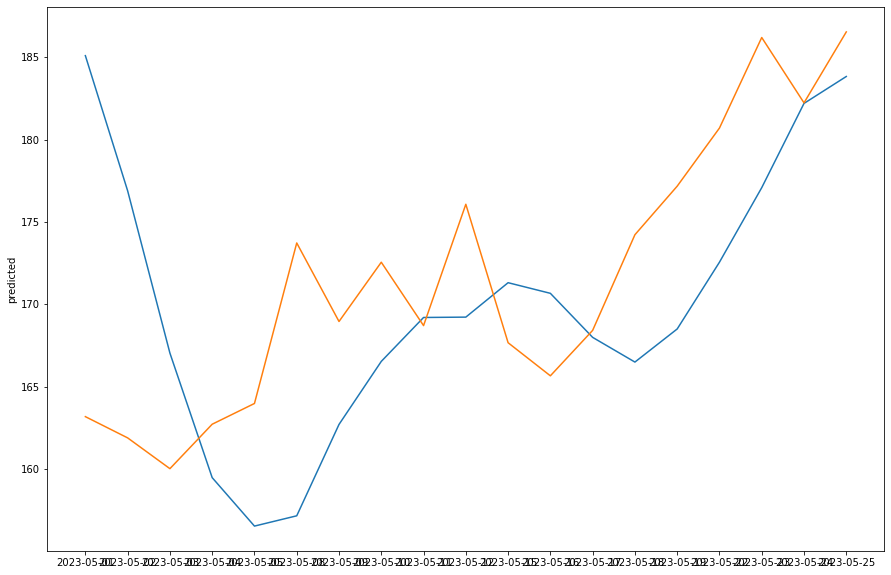

In [177]:
plt.figure(figsize=(15,10))
sns.lineplot(x=dates['Date'].values,y=data_for_testing['predicted'])
sns.lineplot(x=dates['Date'].values,y=data_for_testing['real'])

<AxesSubplot:ylabel='real'>

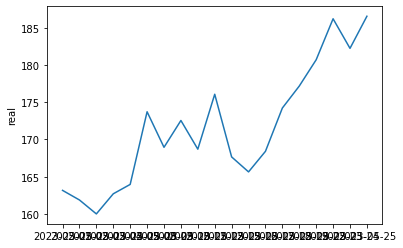

In [178]:
sns.lineplot(x=dates['Date'].values,y=data_for_testing['real'])

<AxesSubplot:>

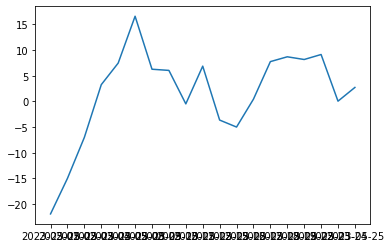

In [179]:
sns.lineplot(x=dates['Date'].values,y=data_for_testing['real']-data_for_testing['predicted'])

In [180]:
# we will do the same for volume

<AxesSubplot:xlabel='Date', ylabel='Volume'>

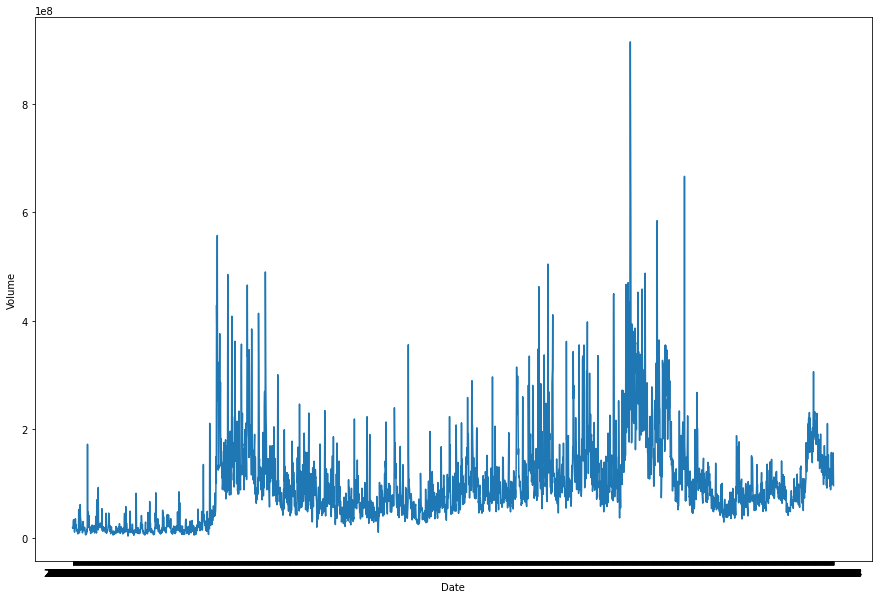

In [182]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df['Date'],y=df['Volume'])

In [183]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,1.789333,1.800000,1.726667,1.774667,1.774667,19245000
1,2011-01-04,1.777333,1.796667,1.734667,1.778000,1.778000,17811000
2,2011-01-05,1.765333,1.793333,1.746000,1.788667,1.788667,21700500
3,2011-01-06,1.788667,1.866667,1.787333,1.858667,1.858667,30918000
4,2011-01-07,1.866667,1.905333,1.860000,1.882667,1.882667,33718500
...,...,...,...,...,...,...,...
3096,2023-04-24,164.649994,165.649994,158.610001,162.550003,162.550003,140006600
3097,2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300
3098,2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100
3099,2023-04-27,152.639999,160.479996,152.369995,160.190002,160.190002,127015200


In [184]:
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
3101,2023-05-01,163.169998,163.279999,158.830002,161.830002,161.830002,109015000
3102,2023-05-02,161.880005,165.490005,158.929993,160.309998,160.309998,128259700
3103,2023-05-03,160.009995,165.000000,159.910004,160.610001,160.610001,119728000
3104,2023-05-04,162.710007,162.949997,159.649994,161.199997,161.199997,95108500
3105,2023-05-05,163.970001,170.789993,163.509995,170.059998,170.059998,107440900
3106,2023-05-08,173.720001,173.800003,169.190002,171.789993,171.789993,112249400
3107,2023-05-09,168.949997,169.820007,166.559998,169.149994,169.149994,88965000
3108,2023-05-10,172.550003,174.429993,166.679993,168.539993,168.539993,119840700
3109,2023-05-11,168.699997,173.570007,166.789993,172.080002,172.080002,103889900
3110,2023-05-12,176.070007,177.380005,167.229996,167.979996,167.979996,157577100


In [185]:
training_set = df_train.iloc[:,6:7]
training_set

,Volume
0,19245000
1,17811000
2,21700500
3,30918000
4,33718500
...,...
3096,140006600
3097,121999300
3098,153364100
3099,127015200


In [186]:
training_set = training_set.values

In [187]:
training_set.shape

(3101, 1)

In [188]:
training_set_scaled = sc.fit_transform(training_set)

In [189]:
training_set_scaled.shape

(3101, 1)

In [190]:
X_train = []
y_train = []

In [192]:
for i in range(60,3101):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    

In [193]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [194]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [195]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout

In [196]:
regressor  = Sequential()

In [197]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape = (X_train.shape[1],1)))

In [198]:
regressor.add(Dropout(0.2))

In [199]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [200]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [201]:
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

In [202]:
regressor.add(Dense(units=1))

In [203]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [204]:
regressor.fit(x=X_train,y = y_train,epochs = 100, batch_size = 32)

Epoch 1/100
133/133 [==============================] - 39s 176ms/step - loss: 0.0047
Epoch 2/100
133/133 [==============================] - 22s 163ms/step - loss: 0.0041
Epoch 3/100
133/133 [==============================] - 22s 164ms/step - loss: 0.0041
Epoch 4/100
133/133 [==============================] - 22s 162ms/step - loss: 0.0040
Epoch 5/100
133/133 [==============================] - 23s 175ms/step - loss: 0.0038
Epoch 6/100
133/133 [==============================] - 22s 167ms/step - loss: 0.0037
Epoch 7/100
133/133 [==============================] - 22s 165ms/step - loss: 0.0036
Epoch 8/100
133/133 [==============================] - 23s 172ms/step - loss: 0.0033
Epoch 9/100
133/133 [==============================] - 23s 173ms/step - loss: 0.0030
Epoch 10/100
133/133 [==============================] - 22s 164ms/step - loss: 0.0030
Epoch 11/100
133/133 [==============================] - 24s 181ms/step - loss: 0.0030
Epoch 12/100
133/133 [==============================] - 22s 164

In [205]:
real_stock_price = df_test.iloc[:,6:7].values

In [206]:
dataset_total = pd.concat([df['Volume'],df_test['Volume']])

In [207]:
dataset_total = pd.DataFrame(dataset_total)

In [208]:
dataset_total

,Volume
0,19245000
1,17811000
2,21700500
3,30918000
4,33718500
...,...
3115,136024200
3116,132001400
3117,156952100
3118,137605100


In [209]:
inputs = dataset_total[len(dataset_total)-len(df_test['Volume'])-60:]

In [210]:
inputs

,Volume
3060,181500700
3061,154193300
3062,128100100
3063,148125800
3064,151897800
...,...
3115,136024200
3116,132001400
3117,156952100
3118,137605100


In [211]:
inputs = inputs.values

In [212]:
inputs = inputs.reshape(-1,1)

In [213]:
inputs = sc.transform(inputs)

In [215]:
X_test = []
for i in range(60,79):
    X_test.append(inputs[i-60:i,0])

In [216]:
X_test = np.array(X_test)

In [217]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [219]:
predicted_stock_volume=regressor.predict(X_test)

1/1 [==============================] - 0s 80ms/step


In [220]:
predicted_stock_volume = sc.inverse_transform(predicted_stock_volume)

In [225]:
len(predicted_stock_volume)

19

In [228]:
real_stock_volume=df_test['Volume']

In [229]:
real_stock_volume.values

array([109015000, 128259700, 119728000,  95108500, 107440900, 112249400,
        88965000, 119840700, 103889900, 157577100, 105592500,  98288800,
       125473600, 109520300, 136024200, 132001400, 156952100, 137605100,
        96598200], dtype=int64)

In [231]:
len(dates['Date'])

19

In [233]:
predicted_stock_volume.shape

(19, 1)

In [236]:
real_stock_volume = real_stock_volume.values

In [238]:
real_stock_volume.reshape(-1,1)

array([[109015000],
       [128259700],
       [119728000],
       [ 95108500],
       [107440900],
       [112249400],
       [ 88965000],
       [119840700],
       [103889900],
       [157577100],
       [105592500],
       [ 98288800],
       [125473600],
       [109520300],
       [136024200],
       [132001400],
       [156952100],
       [137605100],
       [ 96598200]], dtype=int64)

In [240]:
r = pd.DataFrame(real_stock_volume)

In [241]:
p = pd.DataFrame(predicted_stock_volume)

In [248]:
p=p.rename(columns={0:'predicted'})

In [249]:
r=r.rename(columns={0:'real'})

In [257]:
dates=pd.DataFrame(dates['Date'])

In [274]:
dates=dates.reset_index()

In [277]:
dates=dates['Date']

In [278]:
dates = pd.DataFrame(dates)

In [286]:
new_test_df=pd.concat([dates,r,p],axis=1)

In [287]:
new_test_df

,Date,real,predicted
0,2023-05-01,109015000,118888976.0
1,2023-05-02,128259700,124459552.0
2,2023-05-03,119728000,131063960.0
3,2023-05-04,95108500,127666216.0
4,2023-05-05,107440900,115917816.0
5,2023-05-08,112249400,121844632.0
6,2023-05-09,88965000,122024904.0
7,2023-05-10,119840700,110245832.0
8,2023-05-11,103889900,127169448.0
9,2023-05-12,157577100,116204112.0


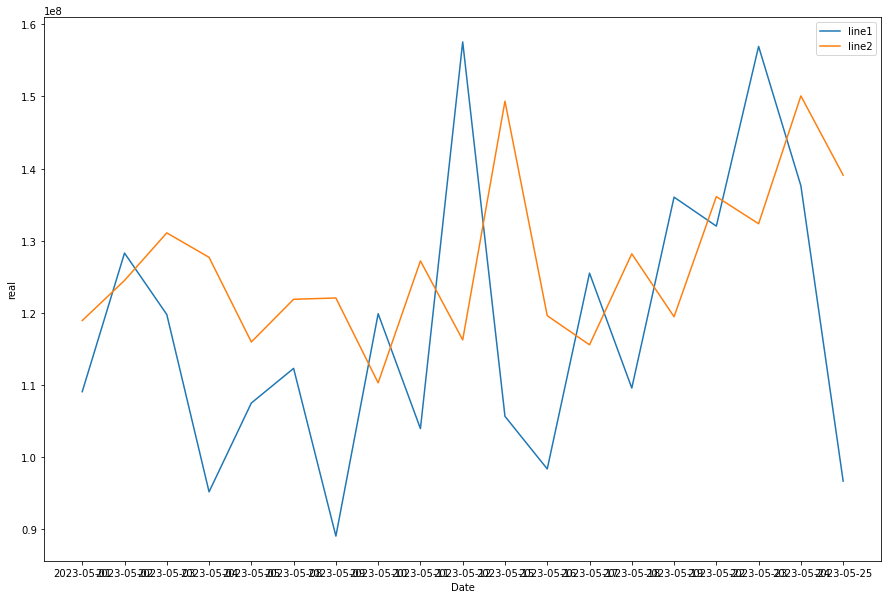

In [291]:
plt.figure(figsize=(15,10))
sns.lineplot(x=new_test_df['Date'],y=new_test_df['real'],label='line1')
sns.lineplot(x=new_test_df['Date'],y=new_test_df['predicted'],label='line2')
plt.legend()

In [ ]:
# error plot 
